<a href="https://colab.research.google.com/github/Roy-Subhankar/Telecom-Churn-Analysis/blob/main/Subhankar_Roy_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

# Importing the libraries


In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from numpy import math

In [4]:
from numpy import loadtxt

In [5]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
#Load and read the data
dataset= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/EDA Capstone Project/Telecom Churn.csv')

# **Basic Analysis**


In [10]:
dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [11]:
dataset.shape

(3333, 20)

**There are 3333 rows and 20 columns in above dataset.**

In [12]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [13]:
dataset.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [14]:
dataset.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

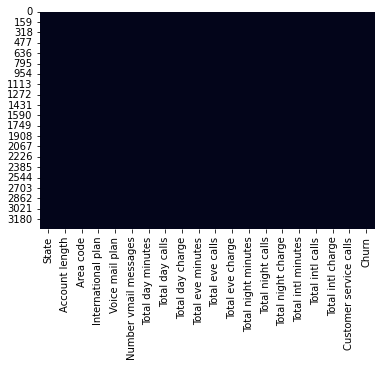

In [15]:
sns.heatmap(dataset.isnull(),cbar=False)

**Above dataset there is no null value.**

In [16]:
# Checking Duplicate Values
len(dataset[dataset.duplicated()])

0

**Above dataset there is no null Duplicate value**

In [17]:
print('columns and data type')
pd.DataFrame(dataset.dtypes).rename(columns={0: 'dtype'})

columns and data type


,dtype
State,object
Account length,int64
Area code,int64
International plan,object
Voice mail plan,object
Number vmail messages,int64
Total day minutes,float64
Total day calls,int64
Total day charge,float64
Total eve minutes,float64


In [18]:
dataset.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [19]:
dataset.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

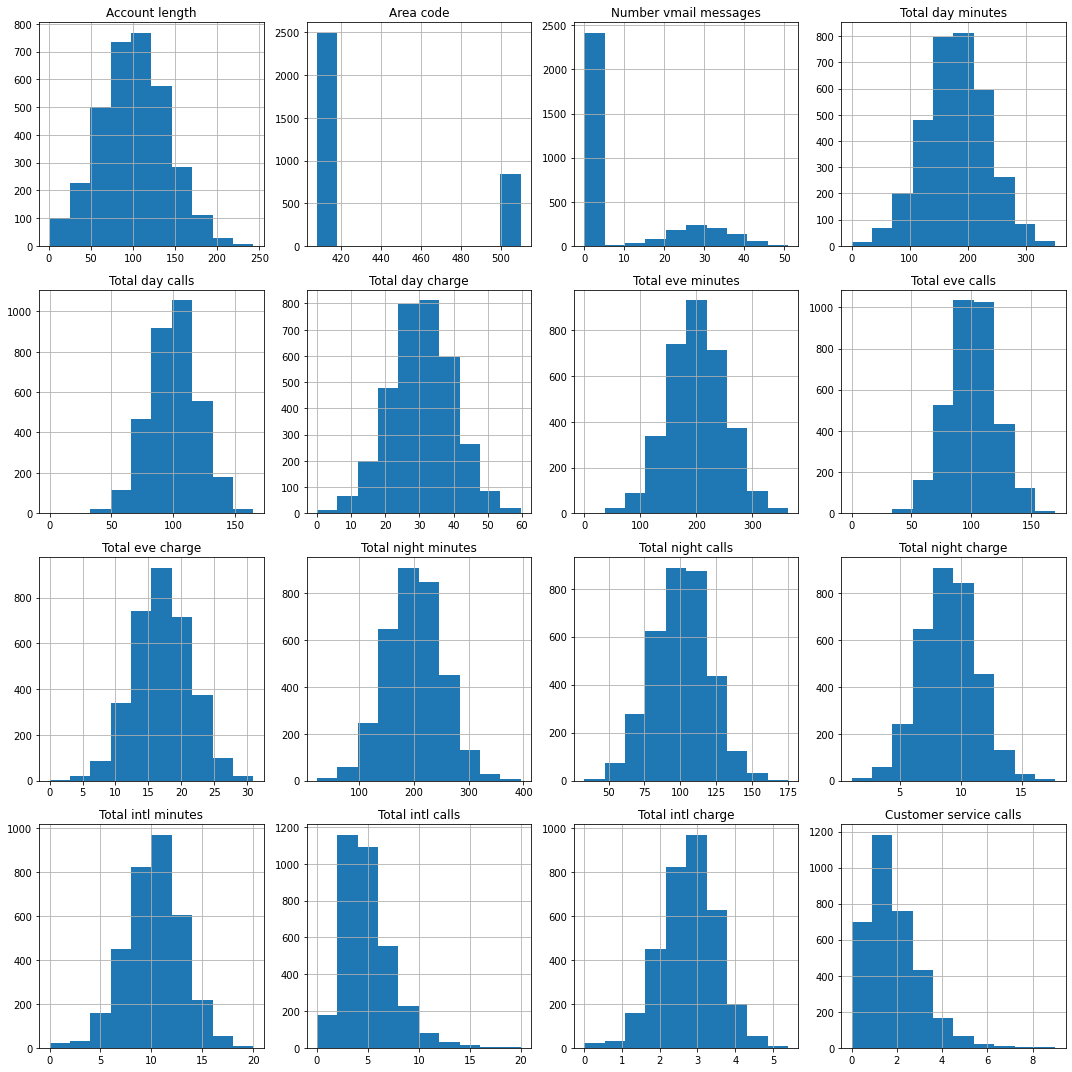

In [20]:
# Freq distribution of all data
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(dataset,ax=ax)
plt.tight_layout();

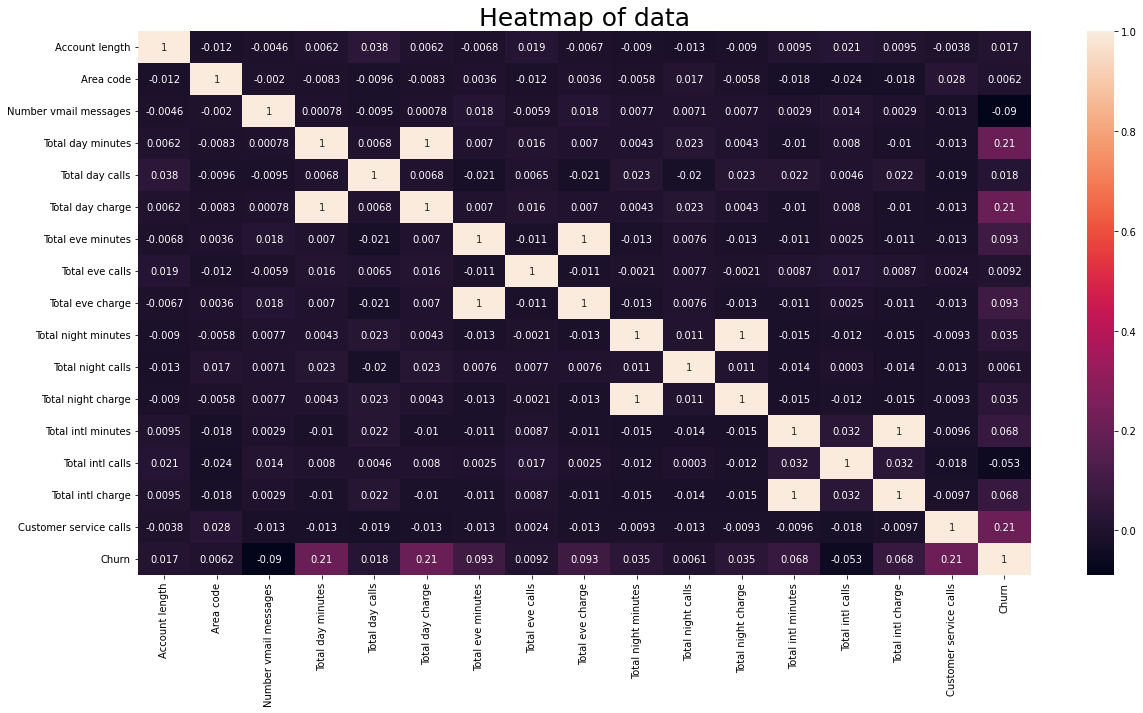

In [21]:
#To find correlation
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(dataset.corr(),annot = True)
plt.title("Heatmap of data",fontsize= 25)
plt.show()

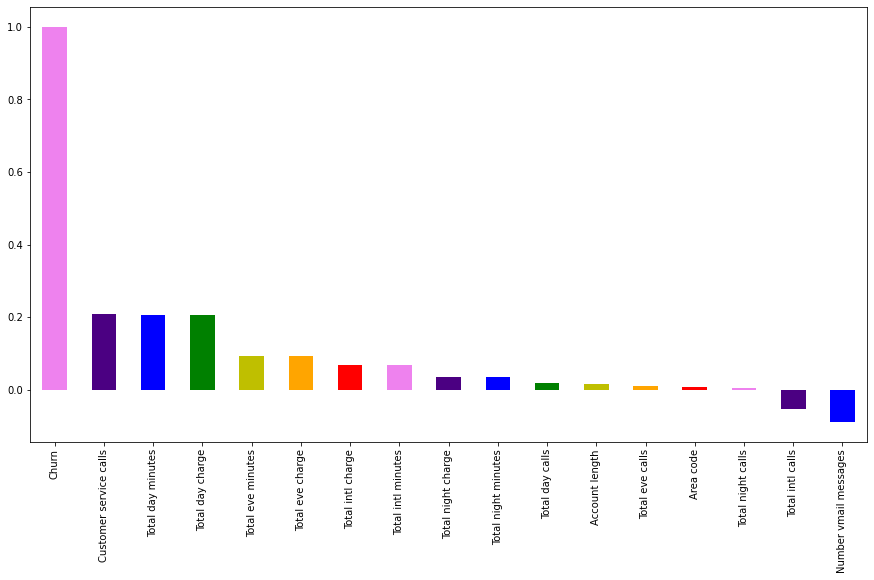

In [22]:
plt.figure(figsize=(15,8))
dataset.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',color = ['violet','indigo','b','g','y','orange','r'])

we see that the data consists of cleaned customer activity data.



Churn Prediction is essentially predicting which clients are most likely to cancel a subscription i.e 'leave a company' based on their usage of the service.
So,our primary aim is to find why customer canceled the subscription.


**Exploratory Data Analysis**

In [23]:
dataset.Churn.value_counts()


False    2850
True      483
Name: Churn, dtype: int64

In [24]:
Total_Churn_percentage=(dataset['Churn'].value_counts(normalize=True)).mul(100).round(2).rename('percentage').reset_index()
Total_Churn_percentage

,index,percentage
0,False,85.51
1,True,14.49


Number of Churn customers = 483 = (14.49%)

Number of non-Churn  customers = 2850 = (85.51%)




Text(0.5, 1.0, 'Churn_percentage')

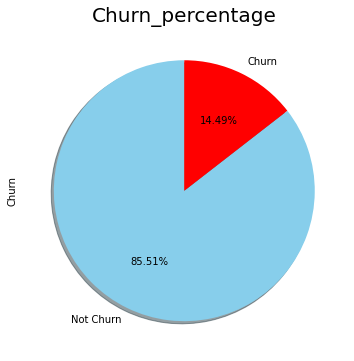

In [25]:
dataset ['Churn'].value_counts().plot(kind='pie', figsize=(20,6),autopct="%1.2f%%",startangle=90, shadow= 'true',colors=['skyblue','red'],
                                      labels=['Not Churn','Churn'],)
plt.title('Churn_percentage',fontsize=20)

##**Column wise Analysis**

###**State**

In [26]:
dataset['State'].nunique(0)

51

In [27]:
dataset.groupby(['State'])['Churn'].mean().mul(100).sort_values(ascending = False).head(10)

State
NJ    26.470588
CA    26.470588
TX    25.000000
MD    24.285714
SC    23.333333
MI    21.917808
MS    21.538462
NV    21.212121
WA    21.212121
ME    20.967742
Name: Churn, dtype: float64

Text(0, 0.5, 'Percentage')

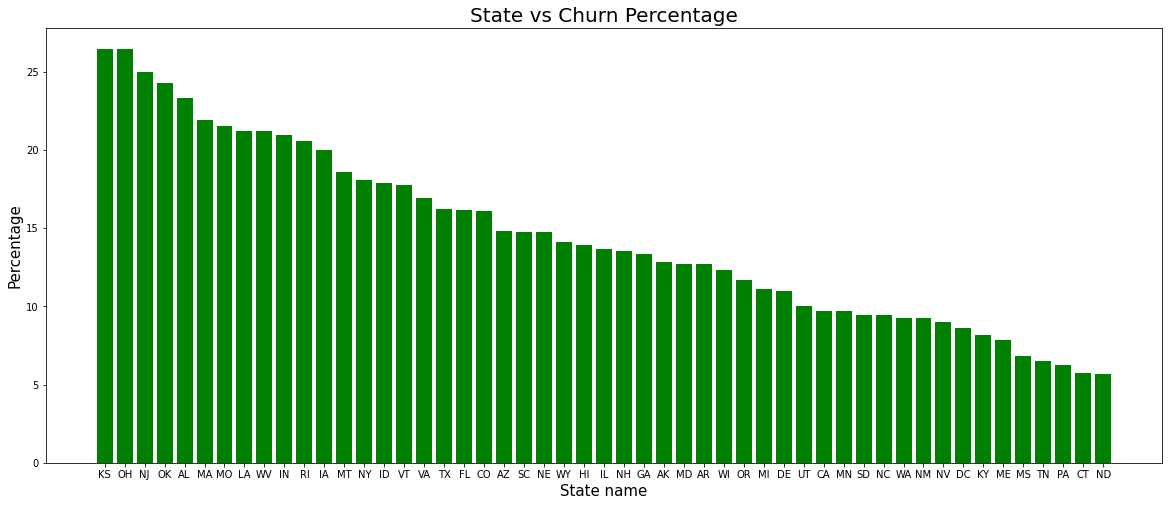

In [28]:
unic_state=dataset.groupby(['State'])['Churn'].mean().mul(100).sort_values(ascending = False)
plt.rcParams['figure.figsize'] = (20, 8)
plt.bar(dataset['State'].unique(),unic_state,color='green')
plt.title('State vs Churn Percentage',fontsize=20)
plt.xlabel('State name',fontsize=15)
plt.ylabel('Percentage',fontsize=15)

There are 51 state who have different churn rate .

CA, NJ ,TX , MD ,SC ,MI are the ones who have higher churn rate more then 21.74% which is more than 50% of average churn rate.

In [29]:
dataset.groupby(['State'])['Churn'].sum().sort_values(ascending = False).head(10)

State
NJ    18
TX    18
MD    17
MI    16
MN    15
NY    15
MT    14
NV    14
MS    14
SC    14
Name: Churn, dtype: int64

Text(0, 0.5, 'Value count')

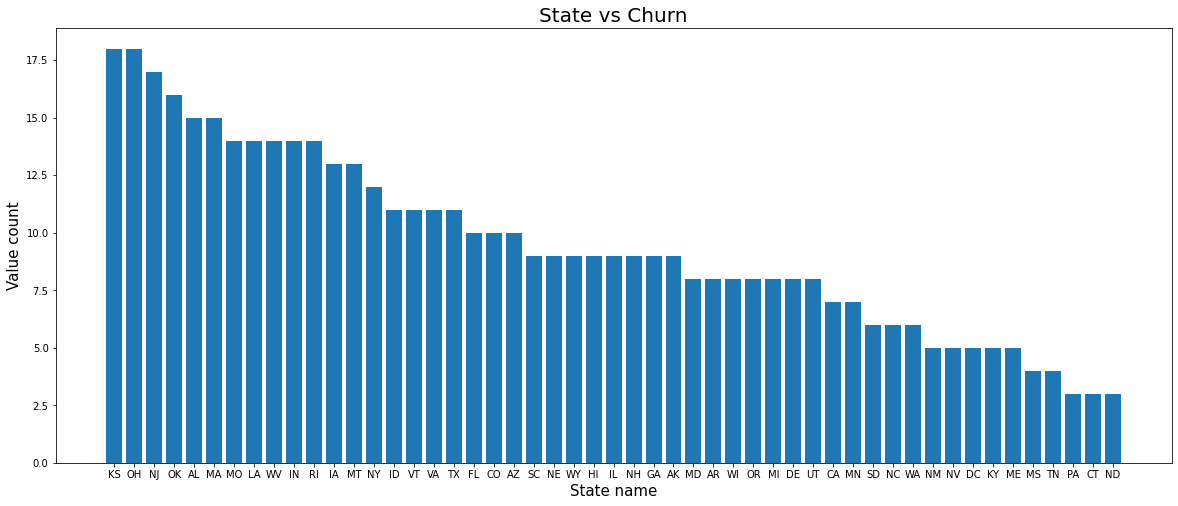

In [30]:
unic_state=dataset.groupby(['State'])['Churn'].sum().sort_values(ascending = False)
plt.rcParams['figure.figsize'] = (20, 8)
plt.bar(dataset['State'].unique(),unic_state)
plt.title('State vs Churn',fontsize=20)
plt.xlabel('State name',fontsize=15)
plt.ylabel('Value count',fontsize=15)

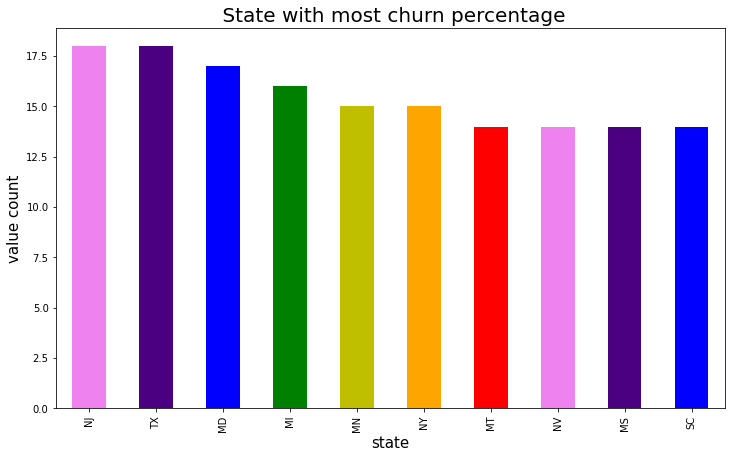

In [31]:

plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((dataset.groupby(['State'])['Churn'].sum())).sort_values(ascending = False).head(10).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('value count', fontsize = 15)
plt.show()

  Out of 51 unique states, NJ ,TX , MD, MI are the ones with higher churn count more then 15.

###**International plan**

In [32]:
print(dataset['International plan'].value_counts(normalize=True)*100)

No     90.309031
Yes     9.690969
Name: International plan, dtype: float64


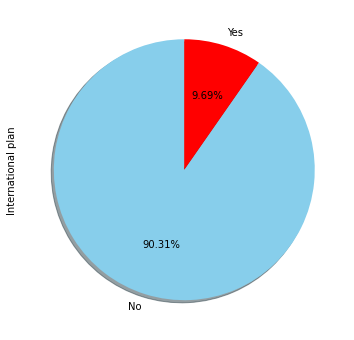

In [33]:
dataset['International plan'].value_counts().plot(kind='pie',figsize=(15,6), autopct="%1.2f%%",startangle=90, shadow=True,labels=['No','Yes'],
                               colors=['skyblue','red'],)
                              
                              

In [34]:
print(dataset.groupby('International plan')['Churn'].mean()*100)

International plan
No     11.495017
Yes    42.414861
Name: Churn, dtype: float64


In [35]:
dataset.groupby('International plan')['Churn'].value_counts()

International plan  Churn
No                  False    2664
                    True      346
Yes                 False     186
                    True      137
Name: Churn, dtype: int64

In [36]:
Churn_percentage=(dataset.groupby('International plan')['Churn'].value_counts(normalize=True).mul(100)).rename('Percentage').reset_index()
Churn_percentage

,International plan,Churn,Percentage
0,No,False,88.504983
1,No,True,11.495017
2,Yes,False,57.585139
3,Yes,True,42.414861


Text(28.35842013888889, 0.5, 'Percentage of Churn')

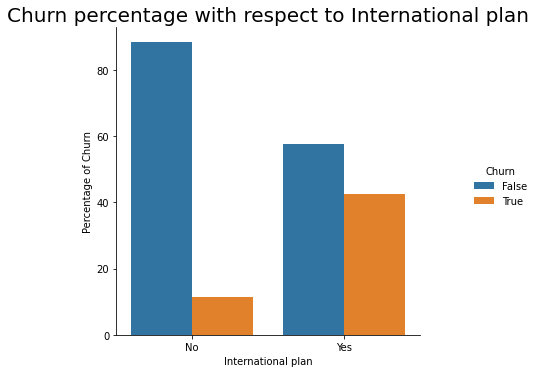

In [37]:
sns.catplot(x='International plan',y='Percentage',hue='Churn',kind='bar',data=Churn_percentage)
plt.title('Churn percentage with respect to International plan',fontsize=20)
plt.ylabel('Percentage of Churn')

In [38]:
dataset['intl call charge']=(dataset['Total intl charge']/dataset['Total intl minutes']).round(2)
dataset.groupby('International plan')['intl call charge'].mean().reset_index()

,International plan,intl call charge
0,No,0.27
1,Yes,0.27


CONCLUSION:

90.31% of total customers don't have an international plan whereas 9.69% have one.

Among those who have an international plan 42.41 % people churn.

Whereas among those who don't have a international plan only 11.4 % people churn.

The reason why people having international plan might be leaving is that they are paying same amount of money for international calls as for those customers who don't have a international plan. Hence they arent getting any benefits for having an international plan so they might be unhappy.

/*Despite of opting for special international plan, those customers have to pay the same amount of the customer who did not opt for the special international plan.*/ 

Customers with the International Plan tend to churn more frequently

VOICE MAIL

In [39]:
dataset['Voice mail plan'].value_counts()

No     2411
Yes     922
Name: Voice mail plan, dtype: int64

In [40]:
print(dataset.groupby('Voice mail plan')['Churn'].value_counts(normalize=True)*100)

Voice mail plan  Churn
No               False    83.284944
                 True     16.715056
Yes              False    91.323210
                 True      8.676790
Name: Churn, dtype: float64


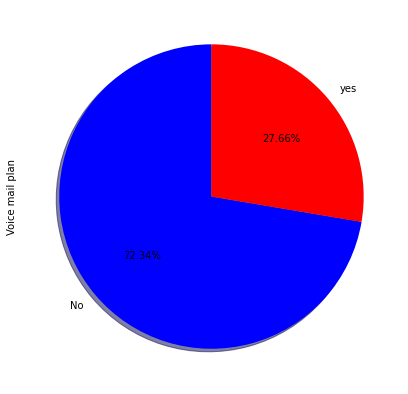

In [ ]:
dataset['Voice mail plan'].value_counts().plot(kind='pie',figsize=(15,7),autopct=('%1.2f%%'),startangle=90,shadow=('true'), colors=['b','red'],labels=['No','yes'])

In [44]:
print(dataset.groupby('Voice mail plan')['Churn'].mean()*100)

Voice mail plan
No     16.715056
Yes     8.676790
Name: Churn, dtype: float64


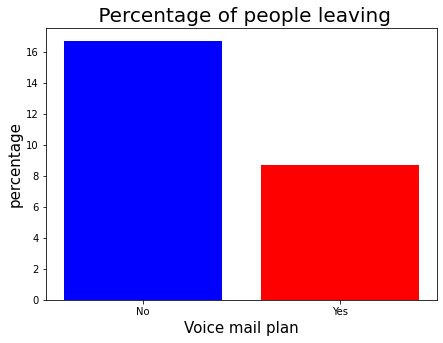

In [ ]:
plt.rcParams['figure.figsize']=(7,5)
a1=list(['No','Yes'])
a2=dataset.groupby('Voice mail plan')['Churn'].mean()*100
plt.bar(a1,a2 ,color=['b','red'])
plt.title(" Percentage of people leaving", fontsize = 20)
plt.xlabel('Voice mail plan', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

In [ ]:
dataset['Number vmail messages'].value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
22      32
35      32
39      30
34      29
37      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
16      13
41      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
50       2
9        2
8        2
11       2
48       2
49       1
4        1
10       1
51       1
Name: Number vmail messages, dtype: int64

In [ ]:
print(dataset.groupby(['Churn'])['Number vmail messages'].mean())

Churn
False    8.604561
True     5.115942
Name: Number vmail messages, dtype: float64


2411 dont have a voice mail plan

922 have a voice mail plan

Among those who dont have a voice mail 16.7 % people churn and who have a voice mail plan only 8.7 % people churn.

CUSTOMER SERVICE CALL

In [ ]:
dataset['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [ ]:
dataset.groupby(['Customer service calls'])['Churn'].mean().mul(100)

Customer service calls
0     13.199426
1     10.330229
2     11.462451
3     10.256410
4     45.783133
5     60.606061
6     63.636364
7     55.555556
8     50.000000
9    100.000000
Name: Churn, dtype: float64

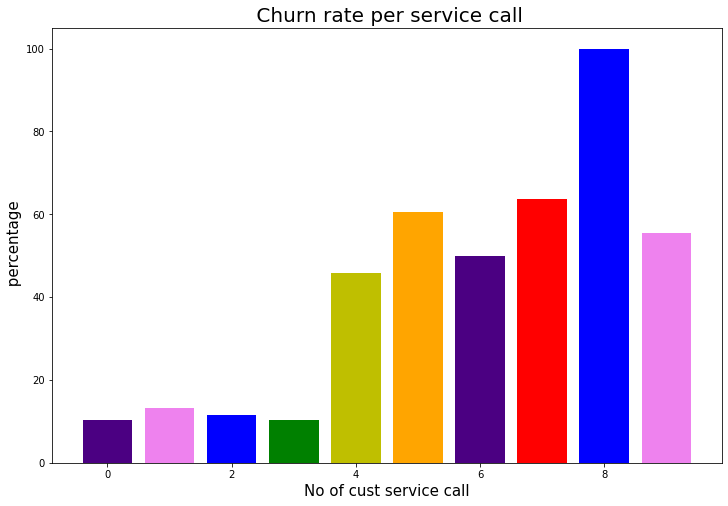

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)


s1=list(dataset['Customer service calls'].unique())
s2=list(dataset.groupby(['Customer service calls'])['Churn'].mean()*100)
plt.bar(s1,s2, color = ['violet','indigo','b','g','y','orange','r'])


plt.title(" Churn rate per service call", fontsize = 20)
plt.xlabel('No of cust service call', fontsize = 15)
plt.ylabel(' percentage', fontsize = 15)
plt.show()

The service calls of customers varies from 0 to 9 .

Those customers who make more service calls they have a high probability of leaving.
We can see from graph , customers with more then 4 service calls their probability of leaving is more then 50 %(Aprx.).

Hence customers who make more then 4 service calls, their queries should be solved immediately and they should be given better service so that they dont leave the company.

Area code

In [ ]:
print(dataset['Area code'].value_counts())

415    1655
510     840
408     838
Name: Area code, dtype: int64


In [ ]:
print(dataset.groupby(['Area code'])['Churn'].value_counts())

Area code  Churn
408        False     716
           True      122
415        False    1419
           True      236
510        False     715
           True      125
Name: Churn, dtype: int64


In [ ]:
print(print(dataset.groupby('Area code')['Churn'].mean()))

Area code
408    0.145585
415    0.142598
510    0.148810
Name: Churn, dtype: float64
None


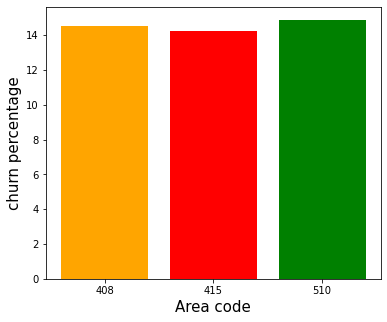

In [ ]:
a1= list(['408','415' , '510'])
b1= dataset.groupby('Area code')['Churn'].mean()*100
plt.bar(a1,b1, color=['orange','red','g'])

plt.rcParams['figure.figsize'] = (6, 5)


plt.xlabel('Area code', fontsize = 15)
plt.ylabel('churn percentage', fontsize = 15)
plt.show()

As all area have around 14% churn rate so, area code dosenot metter.

OVERALL CALLS

In [ ]:
print(dataset.groupby(["Churn"])['Total day calls'].mean())
print(" ")
print(dataset.groupby(["Churn"])['Total day minutes'].mean())
print(" ")
print(dataset.groupby(["Churn"])['Total day charge'].mean())

Churn
False    100.283158
True     101.335404
Name: Total day calls, dtype: float64
 
Churn
False    175.175754
True     206.914079
Name: Total day minutes, dtype: float64
 
Churn
False    29.780421
True     35.175921
Name: Total day charge, dtype: float64


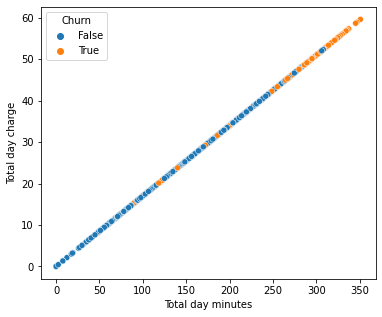

In [ ]:
 sns.scatterplot(x="Total day minutes", y="Total day charge", hue="Churn", data=dataset)

In [ ]:
print(dataset.groupby(["Churn"])['Total eve calls'].mean())
print(" ")
print(dataset.groupby(["Churn"])['Total eve minutes'].mean())
print(" ")
print(dataset.groupby(["Churn"])['Total eve charge'].mean())

Churn
False    100.038596
True     100.561077
Name: Total eve calls, dtype: float64
 
Churn
False    199.043298
True     212.410145
Name: Total eve minutes, dtype: float64
 
Churn
False    16.918909
True     18.054969
Name: Total eve charge, dtype: float64


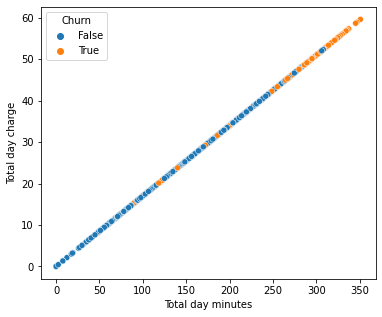

In [ ]:
sns.scatterplot(x="Total day minutes", y="Total day charge", hue="Churn", data=dataset)

In [ ]:
print(dataset.groupby(["Churn"])['Total night calls'].mean())
print(" ")
print(dataset.groupby(["Churn"])['Total night minutes'].mean())
print(" ")
print(dataset.groupby(["Churn"])['Total night charge'].mean())

Churn
False    100.058246
True     100.399586
Name: Total night calls, dtype: float64
 
Churn
False    200.133193
True     205.231677
Name: Total night minutes, dtype: float64
 
Churn
False    9.006074
True     9.235528
Name: Total night charge, dtype: float64


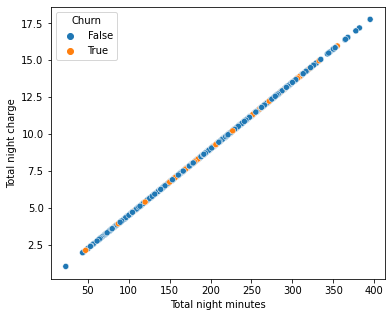

In [ ]:
sns.scatterplot(x="Total night minutes", y="Total night charge", hue="Churn", data=dataset)

In [ ]:
s1= [['Total day minutes',175.17 , 206.91], ['Total day charge',29.78, 35.17]]
minutes_charge= pd.DataFrame(s1, columns = ['day', 'non churn',' churn']) 
minutes_charge

,day,non churn,churn
0,Total day minutes,175.17,206.91
1,Total day charge,29.78,35.17


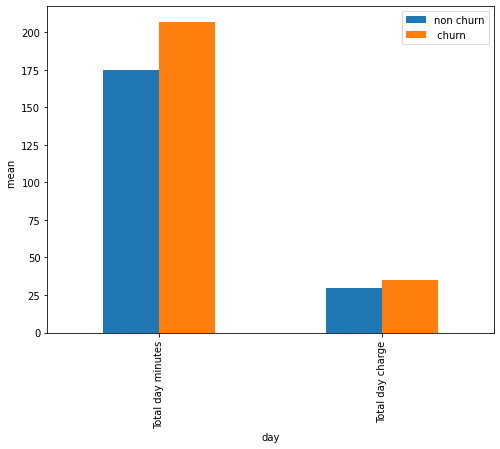

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)


minutes_charge.plot(kind='bar', x='day',ylabel='mean  ')

In [ ]:
s2 = [ ['Total eve minutes',199.04, 212.41], ['Total night minutes',200.13,205.23]] 
evg_night= pd.DataFrame(s2, columns = ['minutes', 'Non churn',' churn'])
evg_night

,minutes,Non churn,churn
0,Total eve minutes,199.04,212.41
1,Total night minutes,200.13,205.23


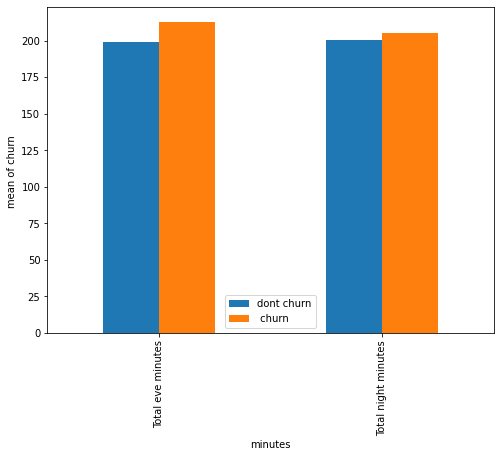

In [ ]:
plt.rcParams['figure.figsize'] = (8,6)


evg_night.plot(kind='bar', x='minutes',xlabel='minutes',ylabel='mean of churn ')

In [ ]:
s3 = [ ['Total eve charge',16.91, 18.05], ['Total night charge',9,9.23]] 
charge= pd.DataFrame(s3 ,columns=['charge', 'Non churn',' churn'])
charge

,charge,Non churn,churn
0,Total eve charge,16.91,18.05
1,Total night charge,9.00,9.23


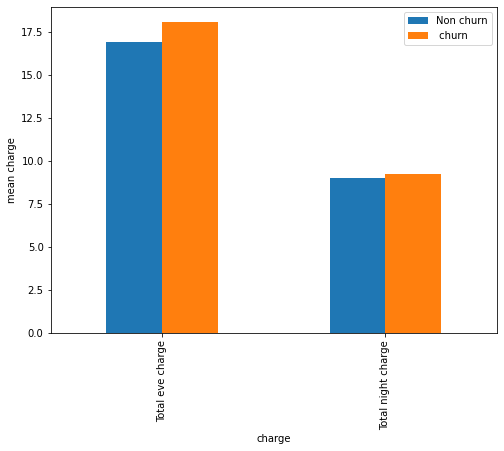

In [ ]:
plt.rcParams['figure.figsize'] = (8,6)


charge.plot(kind='bar', x='charge',ylabel='mean charge')

So, Churn customers talk more minutes than non-churn customers at day,evening and night and they pay more charge than non-churn customers.

retention those customer, company have to create some offer for churn coustomars.